In [1]:
import pandas as pd
data = pd.read_csv('alldata.csv')

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(scales)
%R library(maps)

array(['maps', 'scales', 'ggplot2', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
reviews        5326 non-null float64
location       6953 non-null object
dtypes: float64(1), object(4)
memory usage: 272.1+ KB


In [4]:
data.head()

position             company  \
0                               Development Director             ALS TDI   
1  An Ostentatiously-Excitable Principal Research...  The Hexagon Lavish   
2                                     Data Scientist      Xpert Staffing   
3                                       Data Analyst      Operation HOPE   
4  Assistant Professor -TT - Signal Processing & ...    Emory University   

                                         description  reviews  \
0  Development Director\nALS Therapy Development ...      NaN   
1  Job Description\n\n"The road that leads to acc...      NaN   
2  Growing company located in the Atlanta, GA are...      NaN   
3  DEPARTMENT: Program OperationsPOSITION LOCATIO...     44.0   
4  DESCRIPTION\nThe Emory University Department o...    550.0   

             location  
0  Atlanta, GA 30301   
1         Atlanta, GA  
2         Atlanta, GA  
3  Atlanta, GA 30303   
4         Atlanta, GA

In [5]:
for col in data.columns:
    if (data[col].dtype == 'object'):
        data.loc[data[col].isna(), col] = 'nan'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6964 non-null object
company        6964 non-null object
description    6964 non-null object
reviews        5326 non-null float64
location       6964 non-null object
dtypes: float64(1), object(4)
memory usage: 272.1+ KB


In [6]:
import string
no_zip = []
for place in data.location:
    place = place.strip()
    if place[-1] in string.digits:
        no_zip.append(place[:-5].strip())
    else:
        no_zip.append(place.strip())

In [7]:
data.location = pd.Series(no_zip)

In [8]:
location_ct = data.groupby('location', as_index=False).agg({'company':'count'})
location_ct['state'] = location_ct.location.str[-2:]
location_ct.sort_values('state', inplace=True)

In [9]:
#Flags for different regions, will be used for highlighting purposes in ggplot
location_ct.loc[location_ct.state.isin(pd.Series(['CA'])), 'SW'] = 1
location_ct.SW.fillna(0, inplace=True)

location_ct.loc[location_ct.state.isin(pd.Series(['NY', 'NJ', 'MA'])), 'NE'] = 1
location_ct.NE.fillna(0, inplace=True)

location_ct.loc[location_ct.state.isin(pd.Series(['TX'])), 'SC'] = 1
location_ct.SC.fillna(0, inplace=True)

location_ct.loc[location_ct.state.isin(pd.Series(['GA', 'DC'])), 'SE'] = 1
location_ct.SE.fillna(0, inplace=True)

location_ct.loc[location_ct.state.isin(pd.Series(['IL'])), 'MW'] = 1
location_ct.SW.fillna(0, inplace=True)

location_ct.loc[location_ct.state.isin(pd.Series(['CO'])), 'Rocky'] = 1
location_ct.Rocky.fillna(0, inplace=True)

location_ct.loc[location_ct.state.isin(pd.Series(['WA'])), 'NW'] = 1
location_ct.NW.fillna(0, inplace=True)

In [10]:
%R -i location_ct

In [11]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company), data=location_ct, fill='grey85') +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()
ggsave('default', device='jpeg')

R[write to console]: Saving 8.5 x 11 in image



In [12]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company, fill=factor(SW)), data=location_ct) +
scale_fill_manual(values=c('grey85', 'dodgerblue')) +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()
ggsave('SW', device='jpeg')

R[write to console]: Saving 8.5 x 11 in image



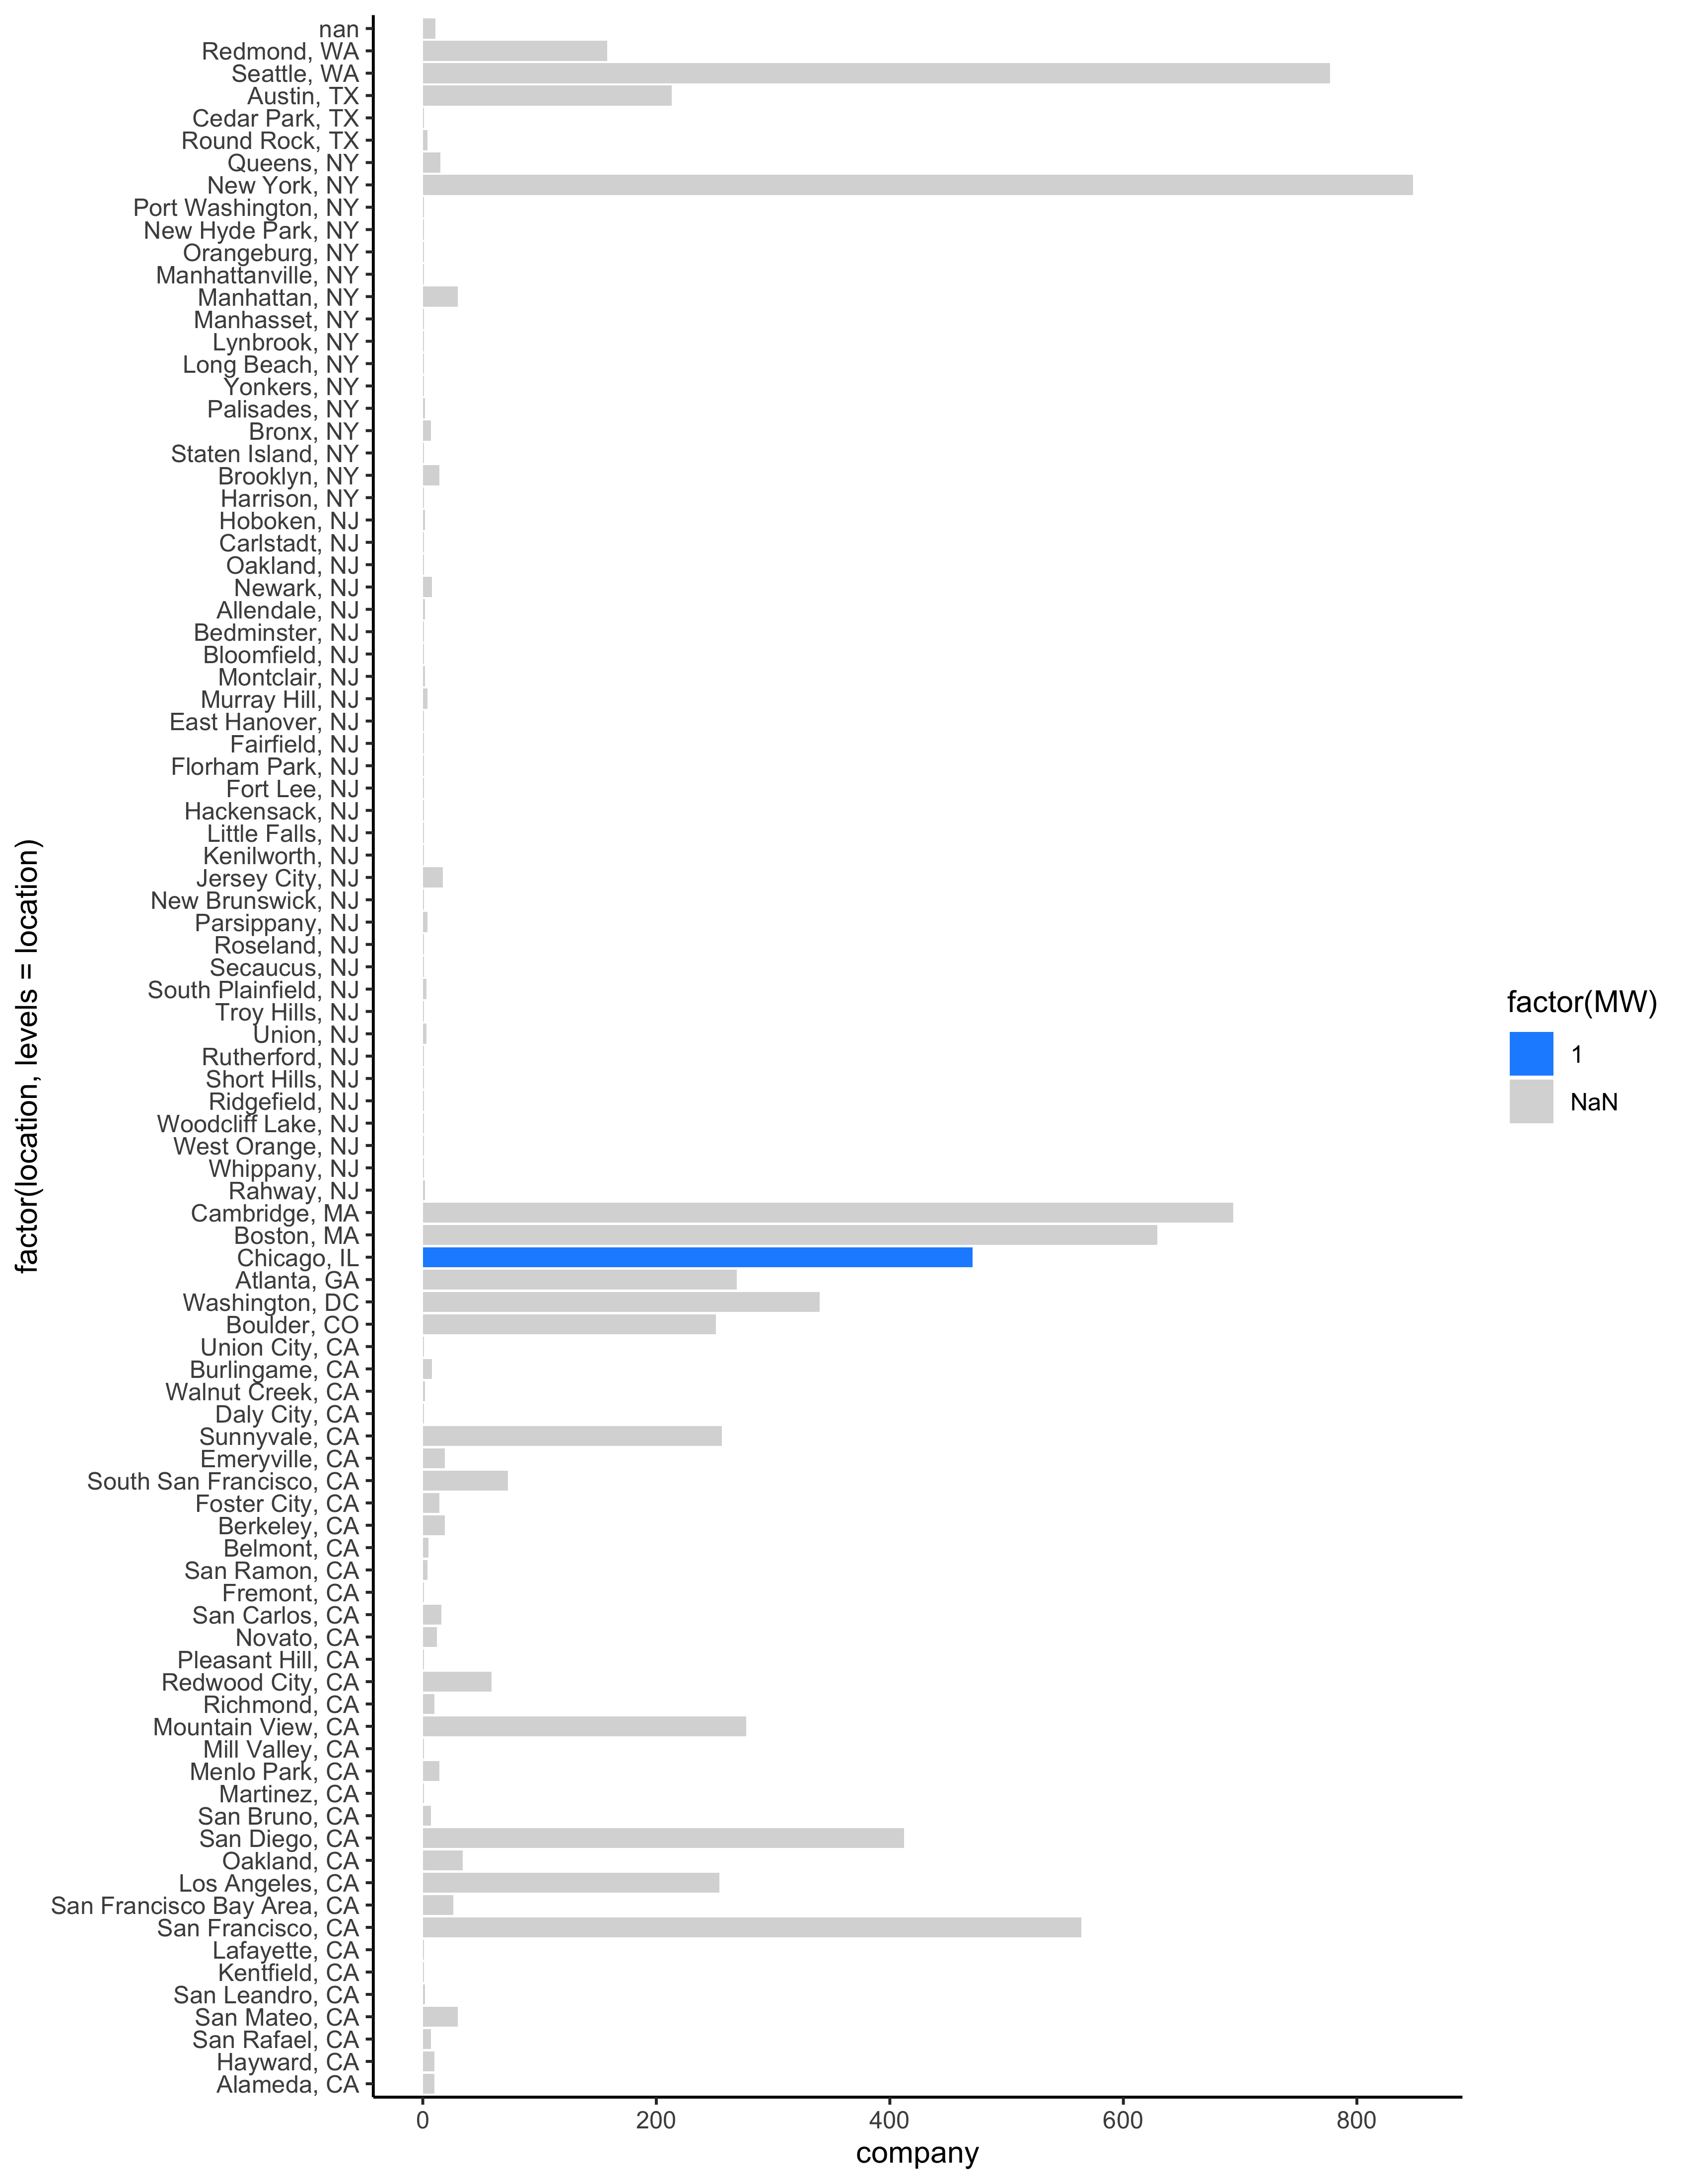

In [13]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company, fill=factor(MW)), data=location_ct) +
scale_fill_manual(values=c('dodgerblue', 'grey85')) +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()

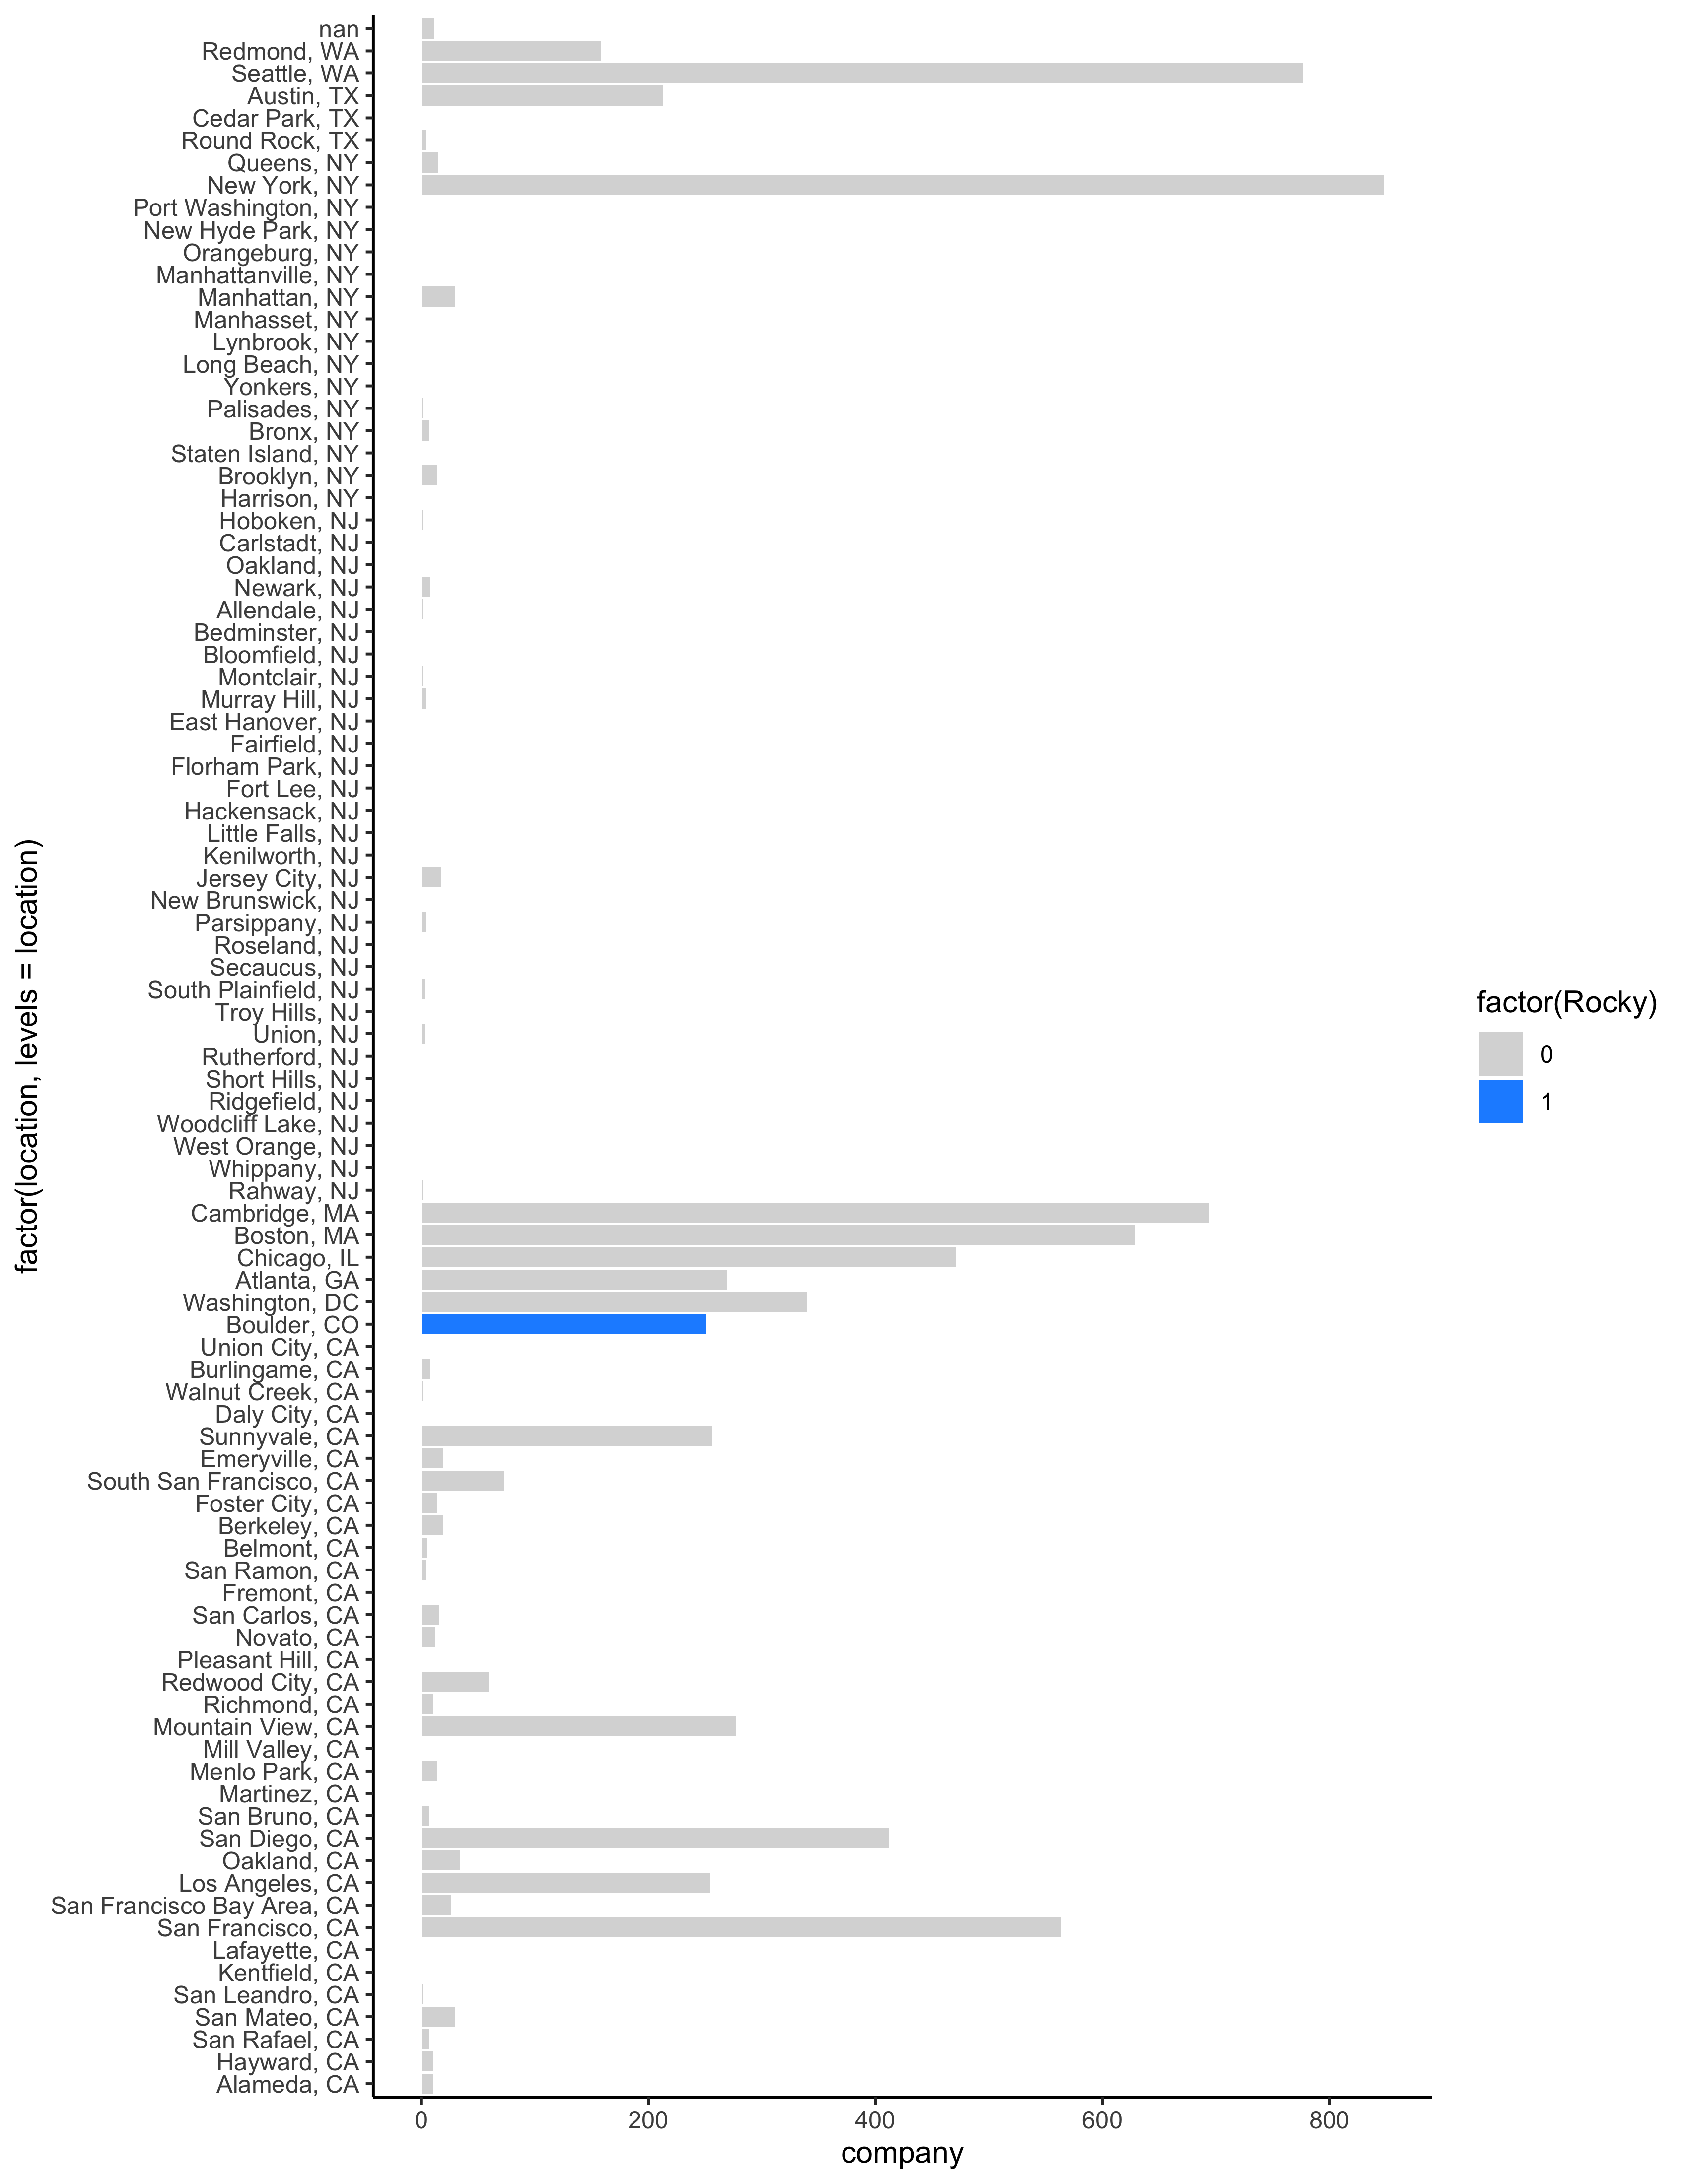

In [14]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company, fill=factor(Rocky)), data=location_ct) +
scale_fill_manual(values=c('grey85', 'dodgerblue')) +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()

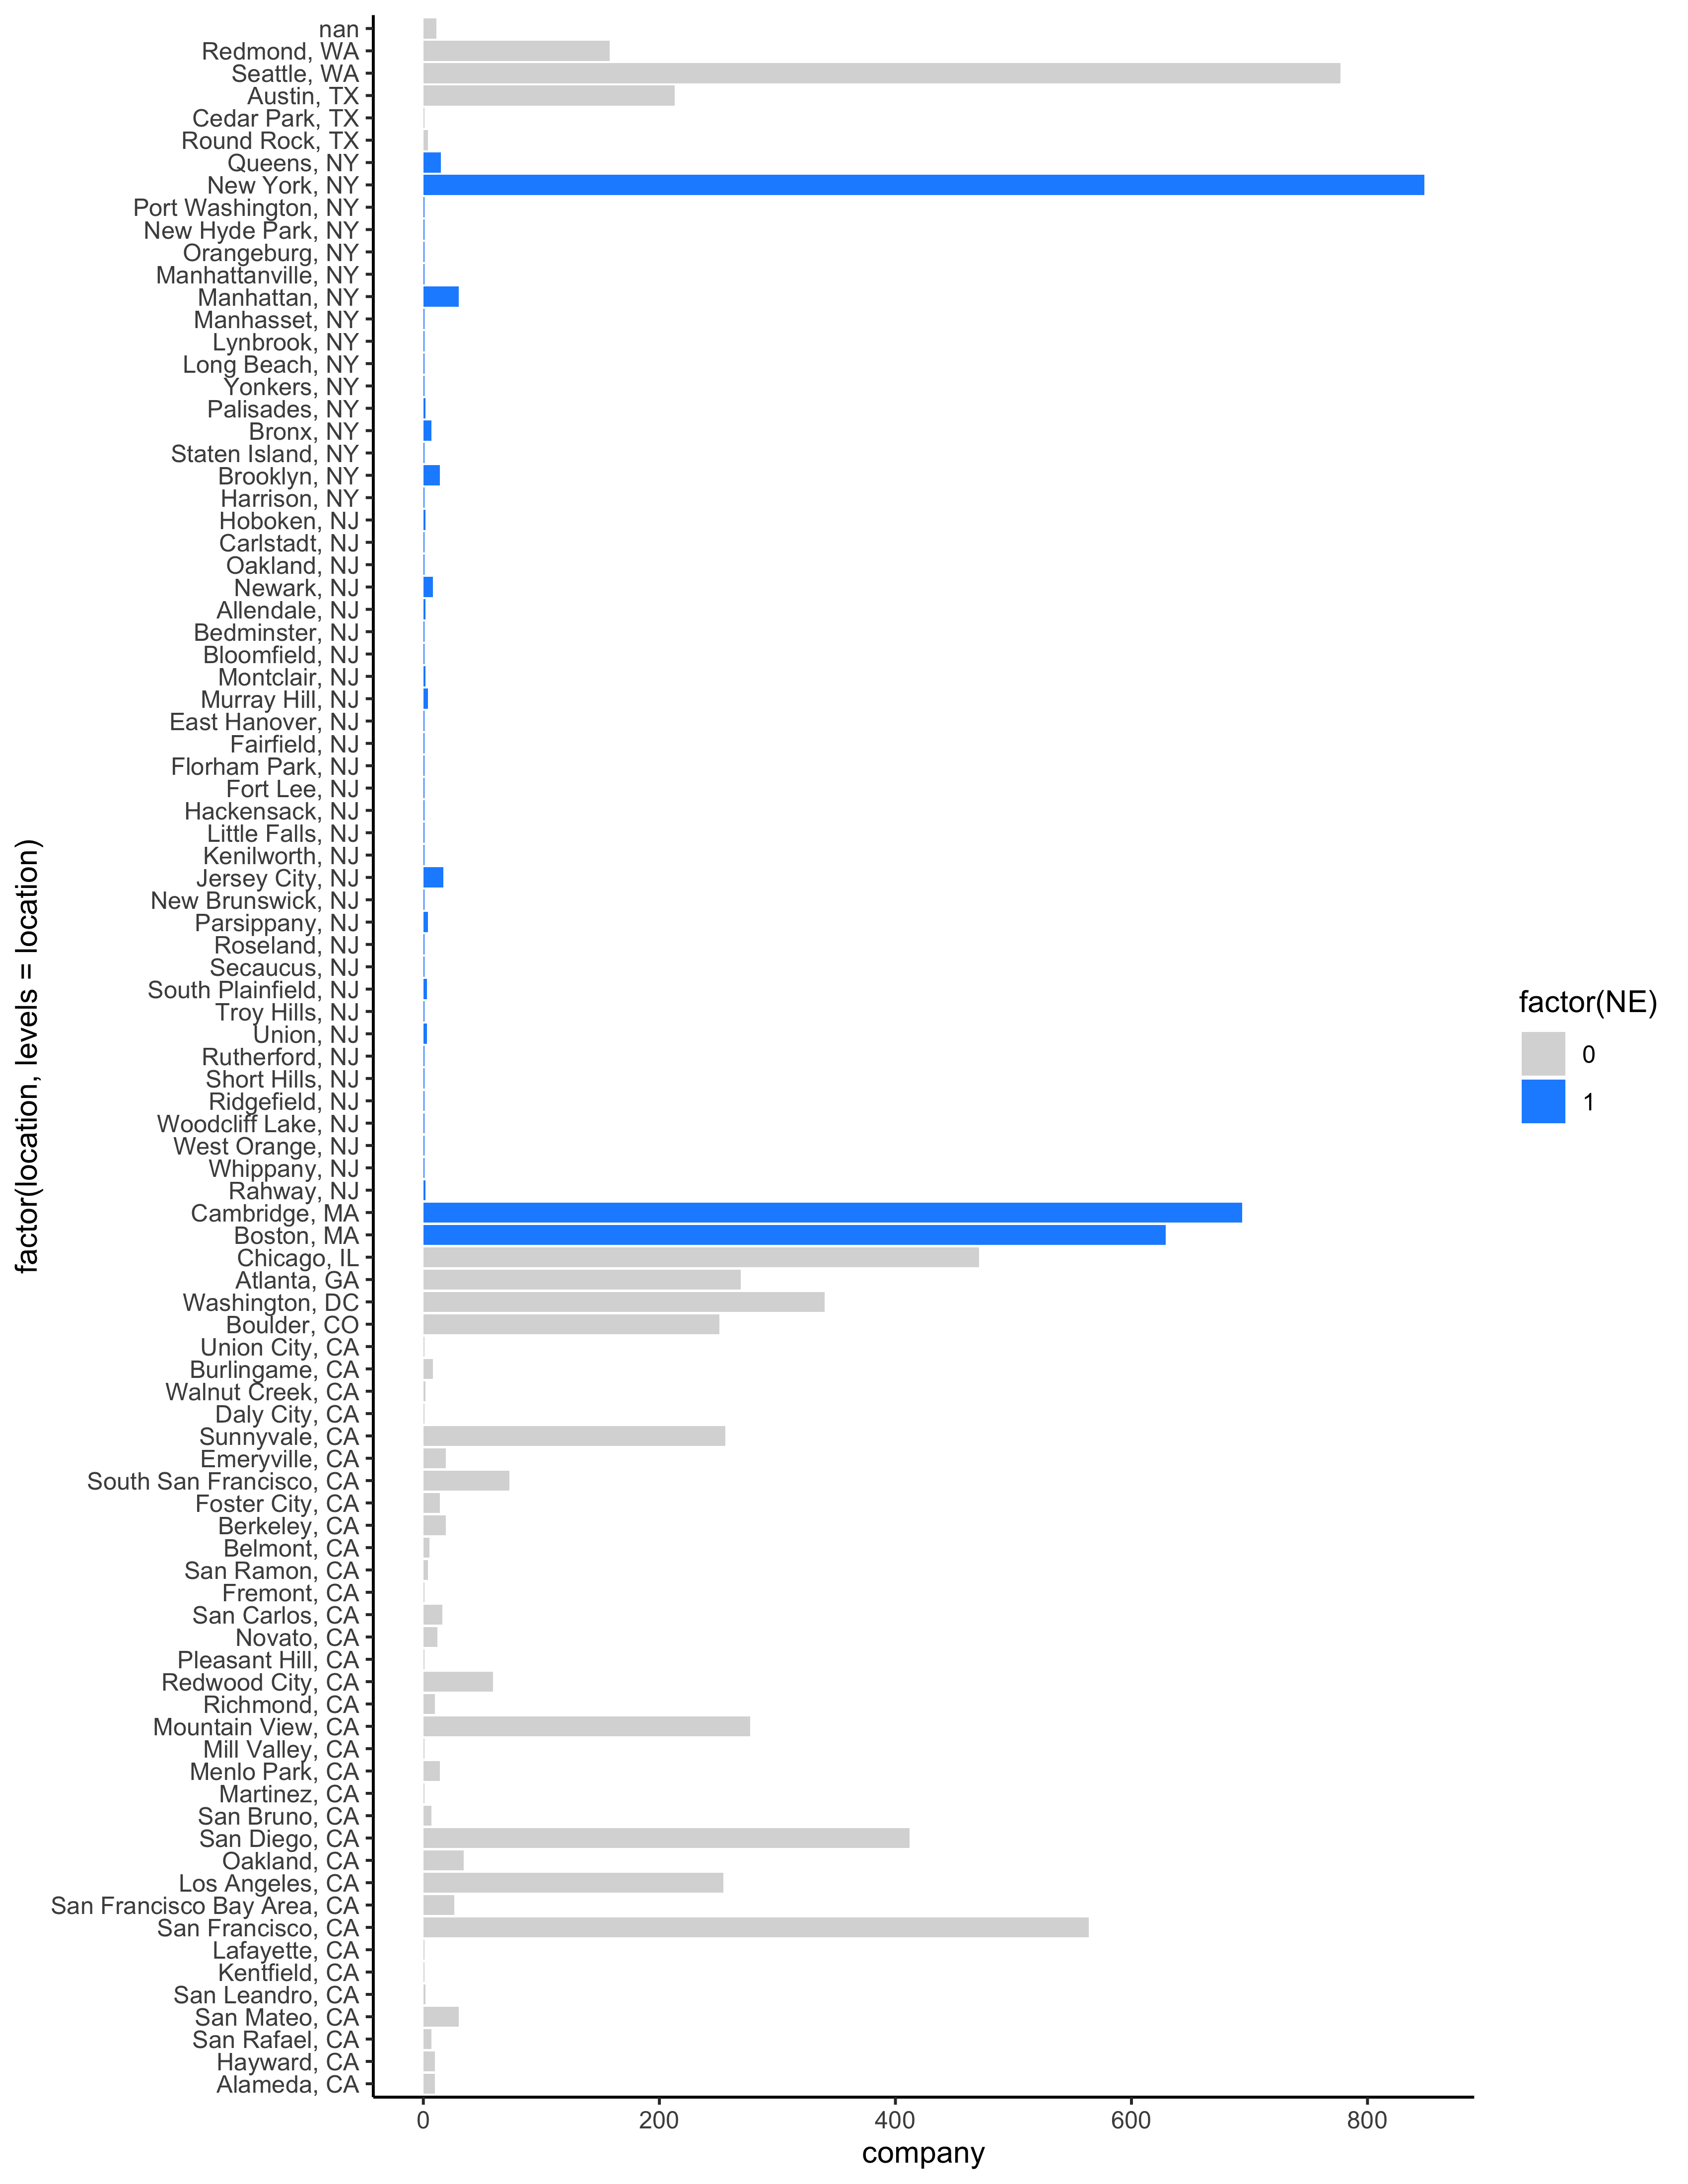

In [15]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company, fill=factor(NE)), data=location_ct) +
scale_fill_manual(values=c('grey85', 'dodgerblue')) +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()

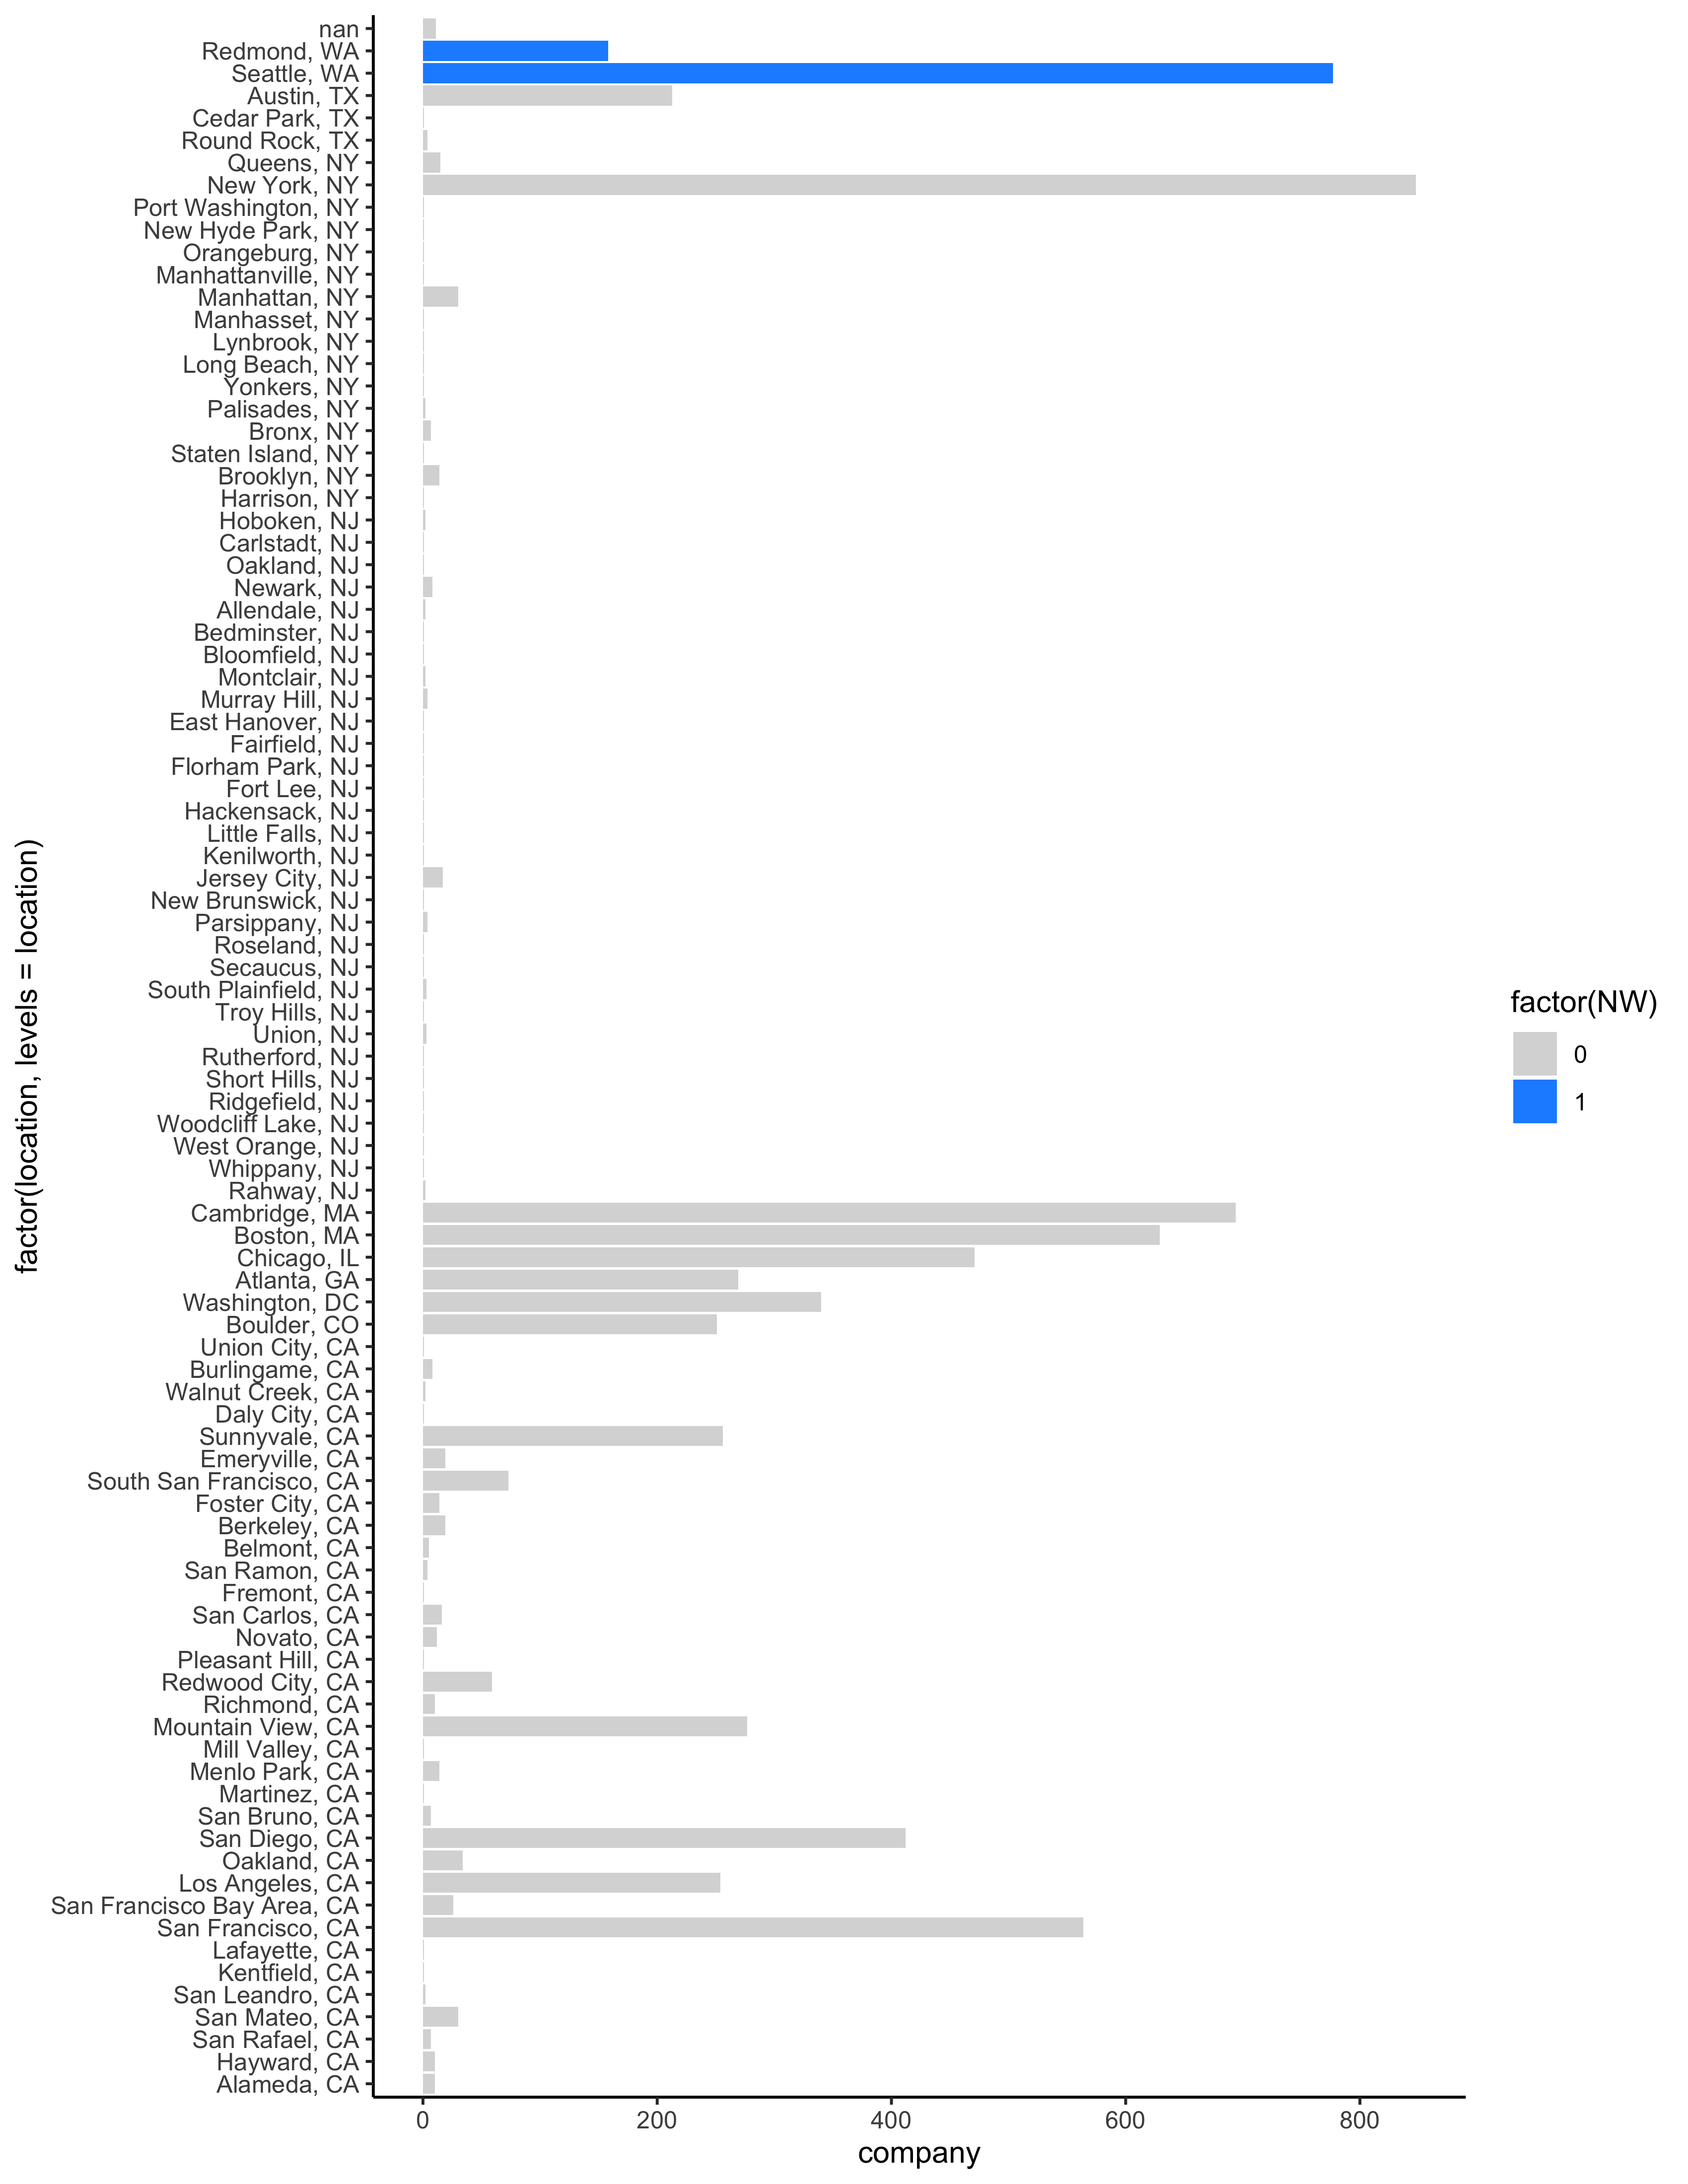

In [16]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company, fill=factor(NW)), data=location_ct) +
scale_fill_manual(values=c('grey85', 'dodgerblue')) +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()

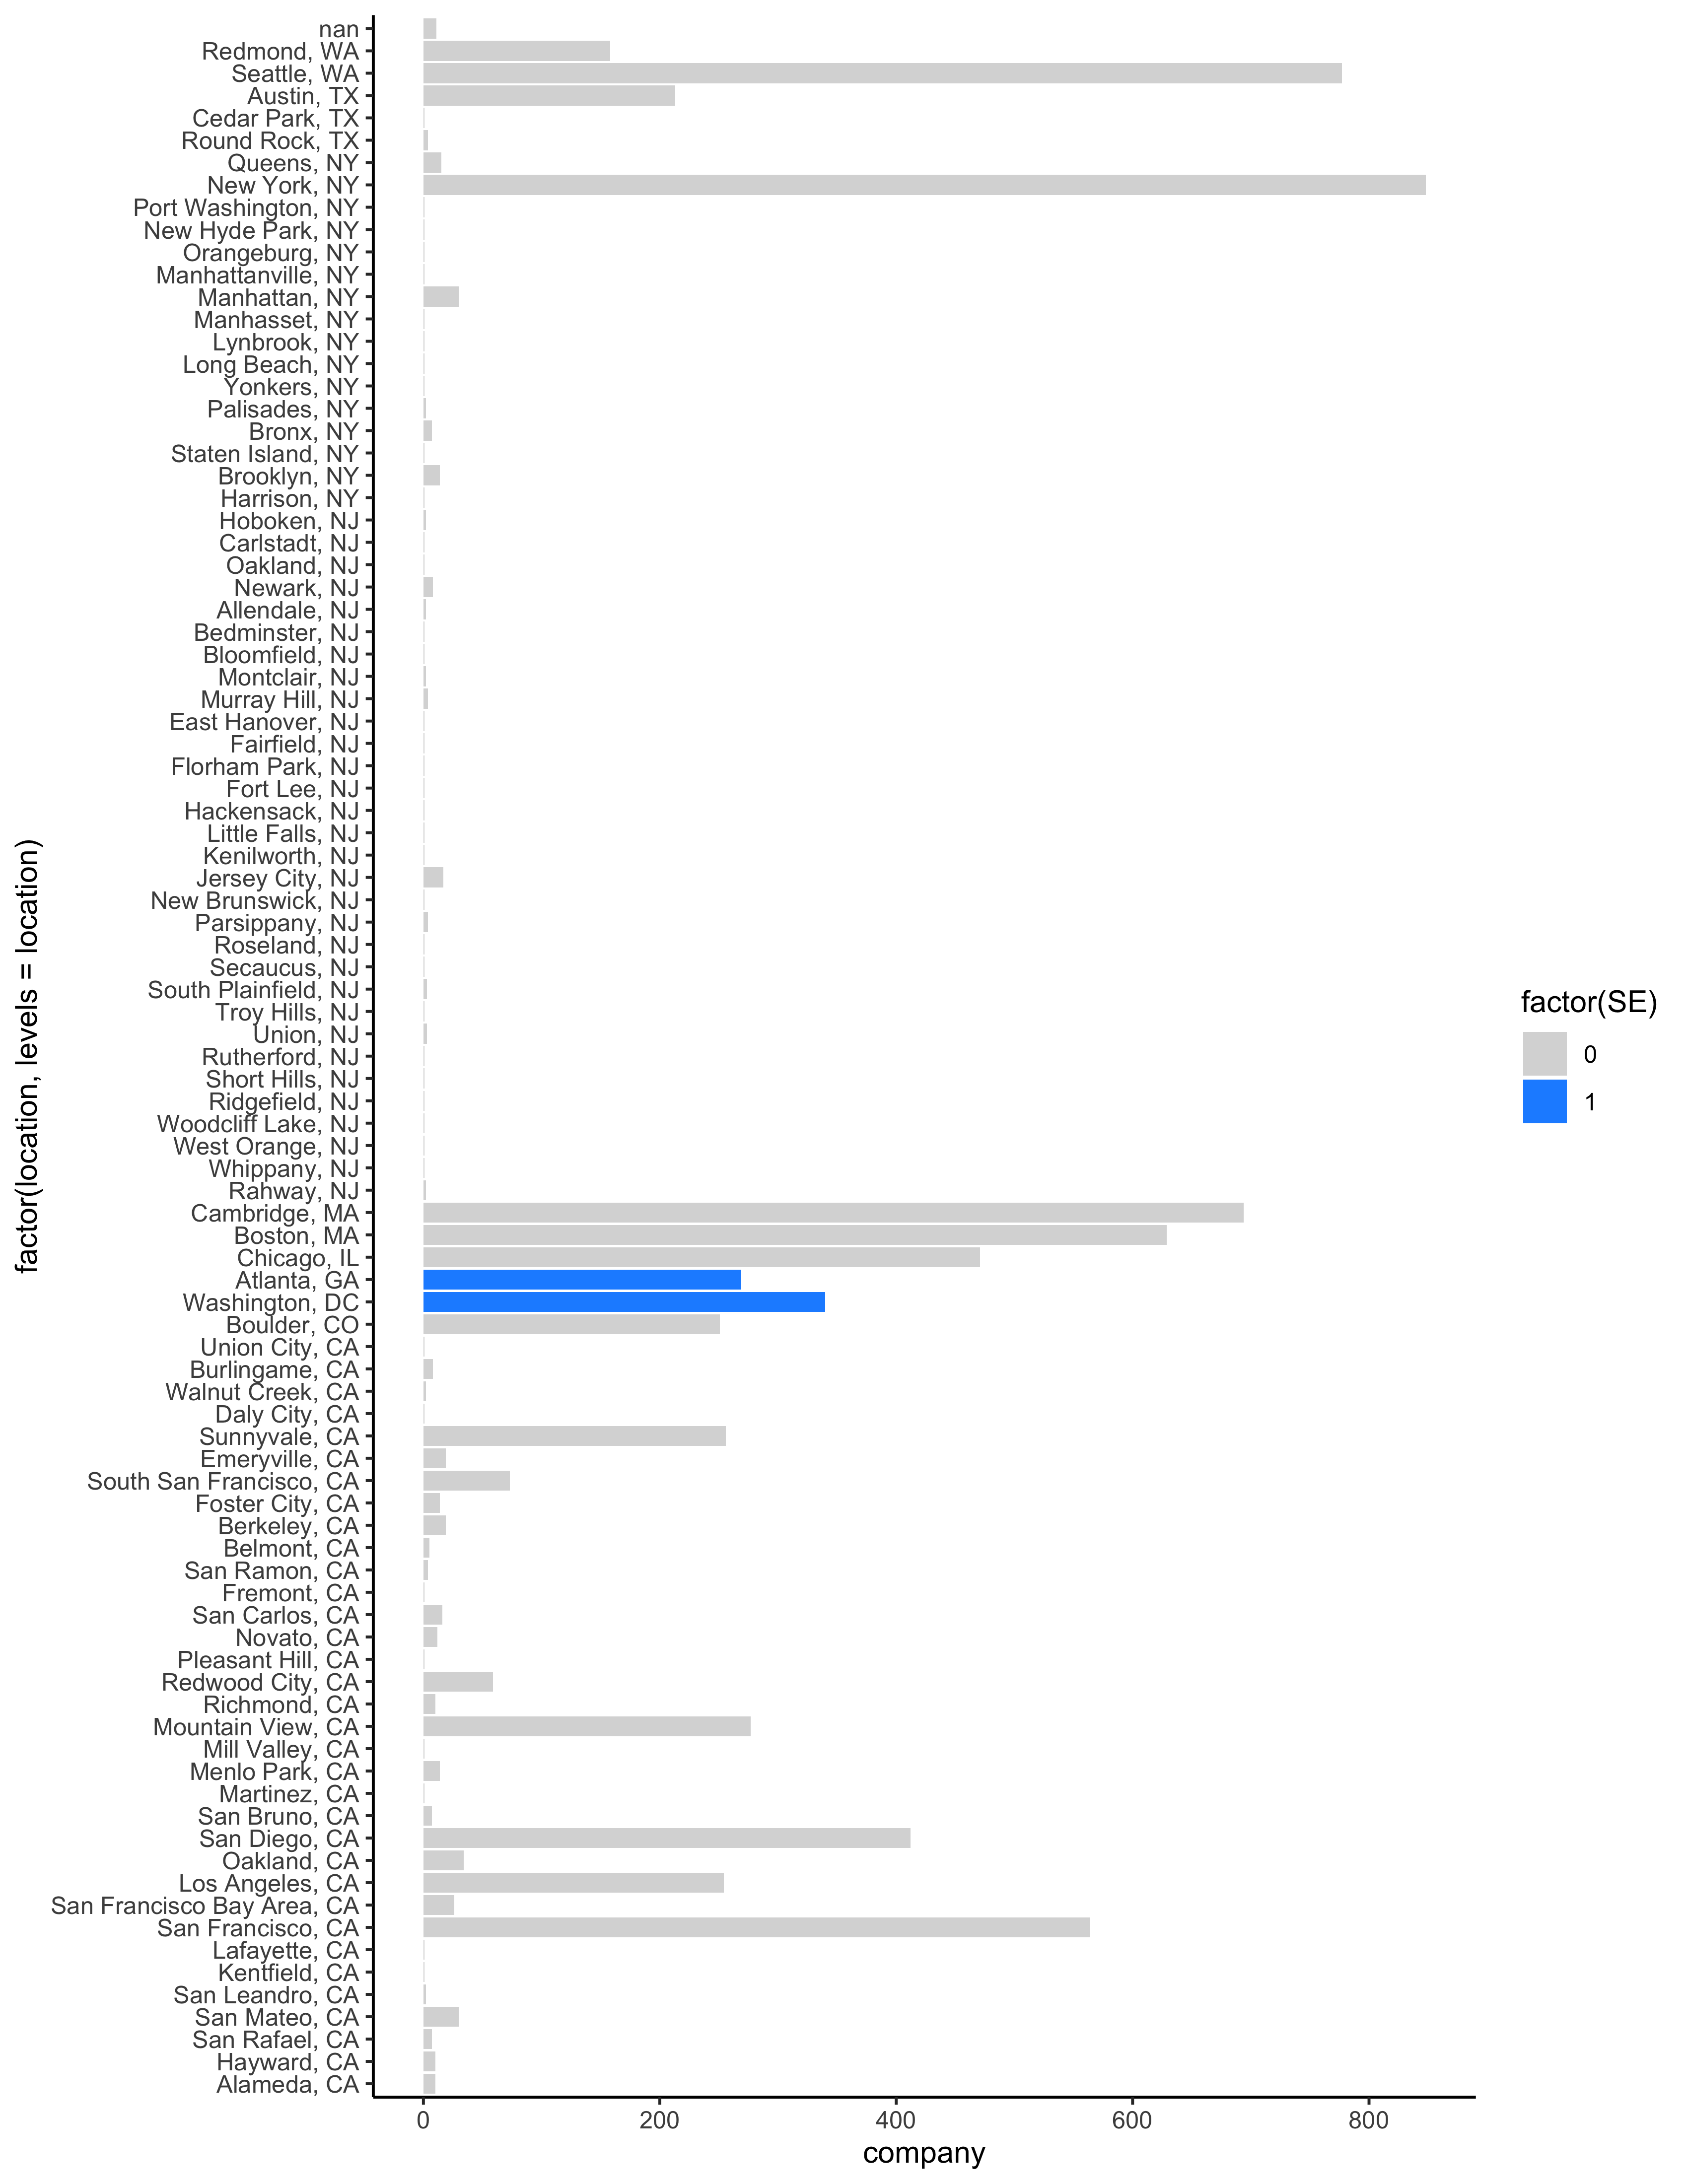

In [17]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company, fill=factor(SE)), data=location_ct) +
scale_fill_manual(values=c('grey85', 'dodgerblue')) +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()

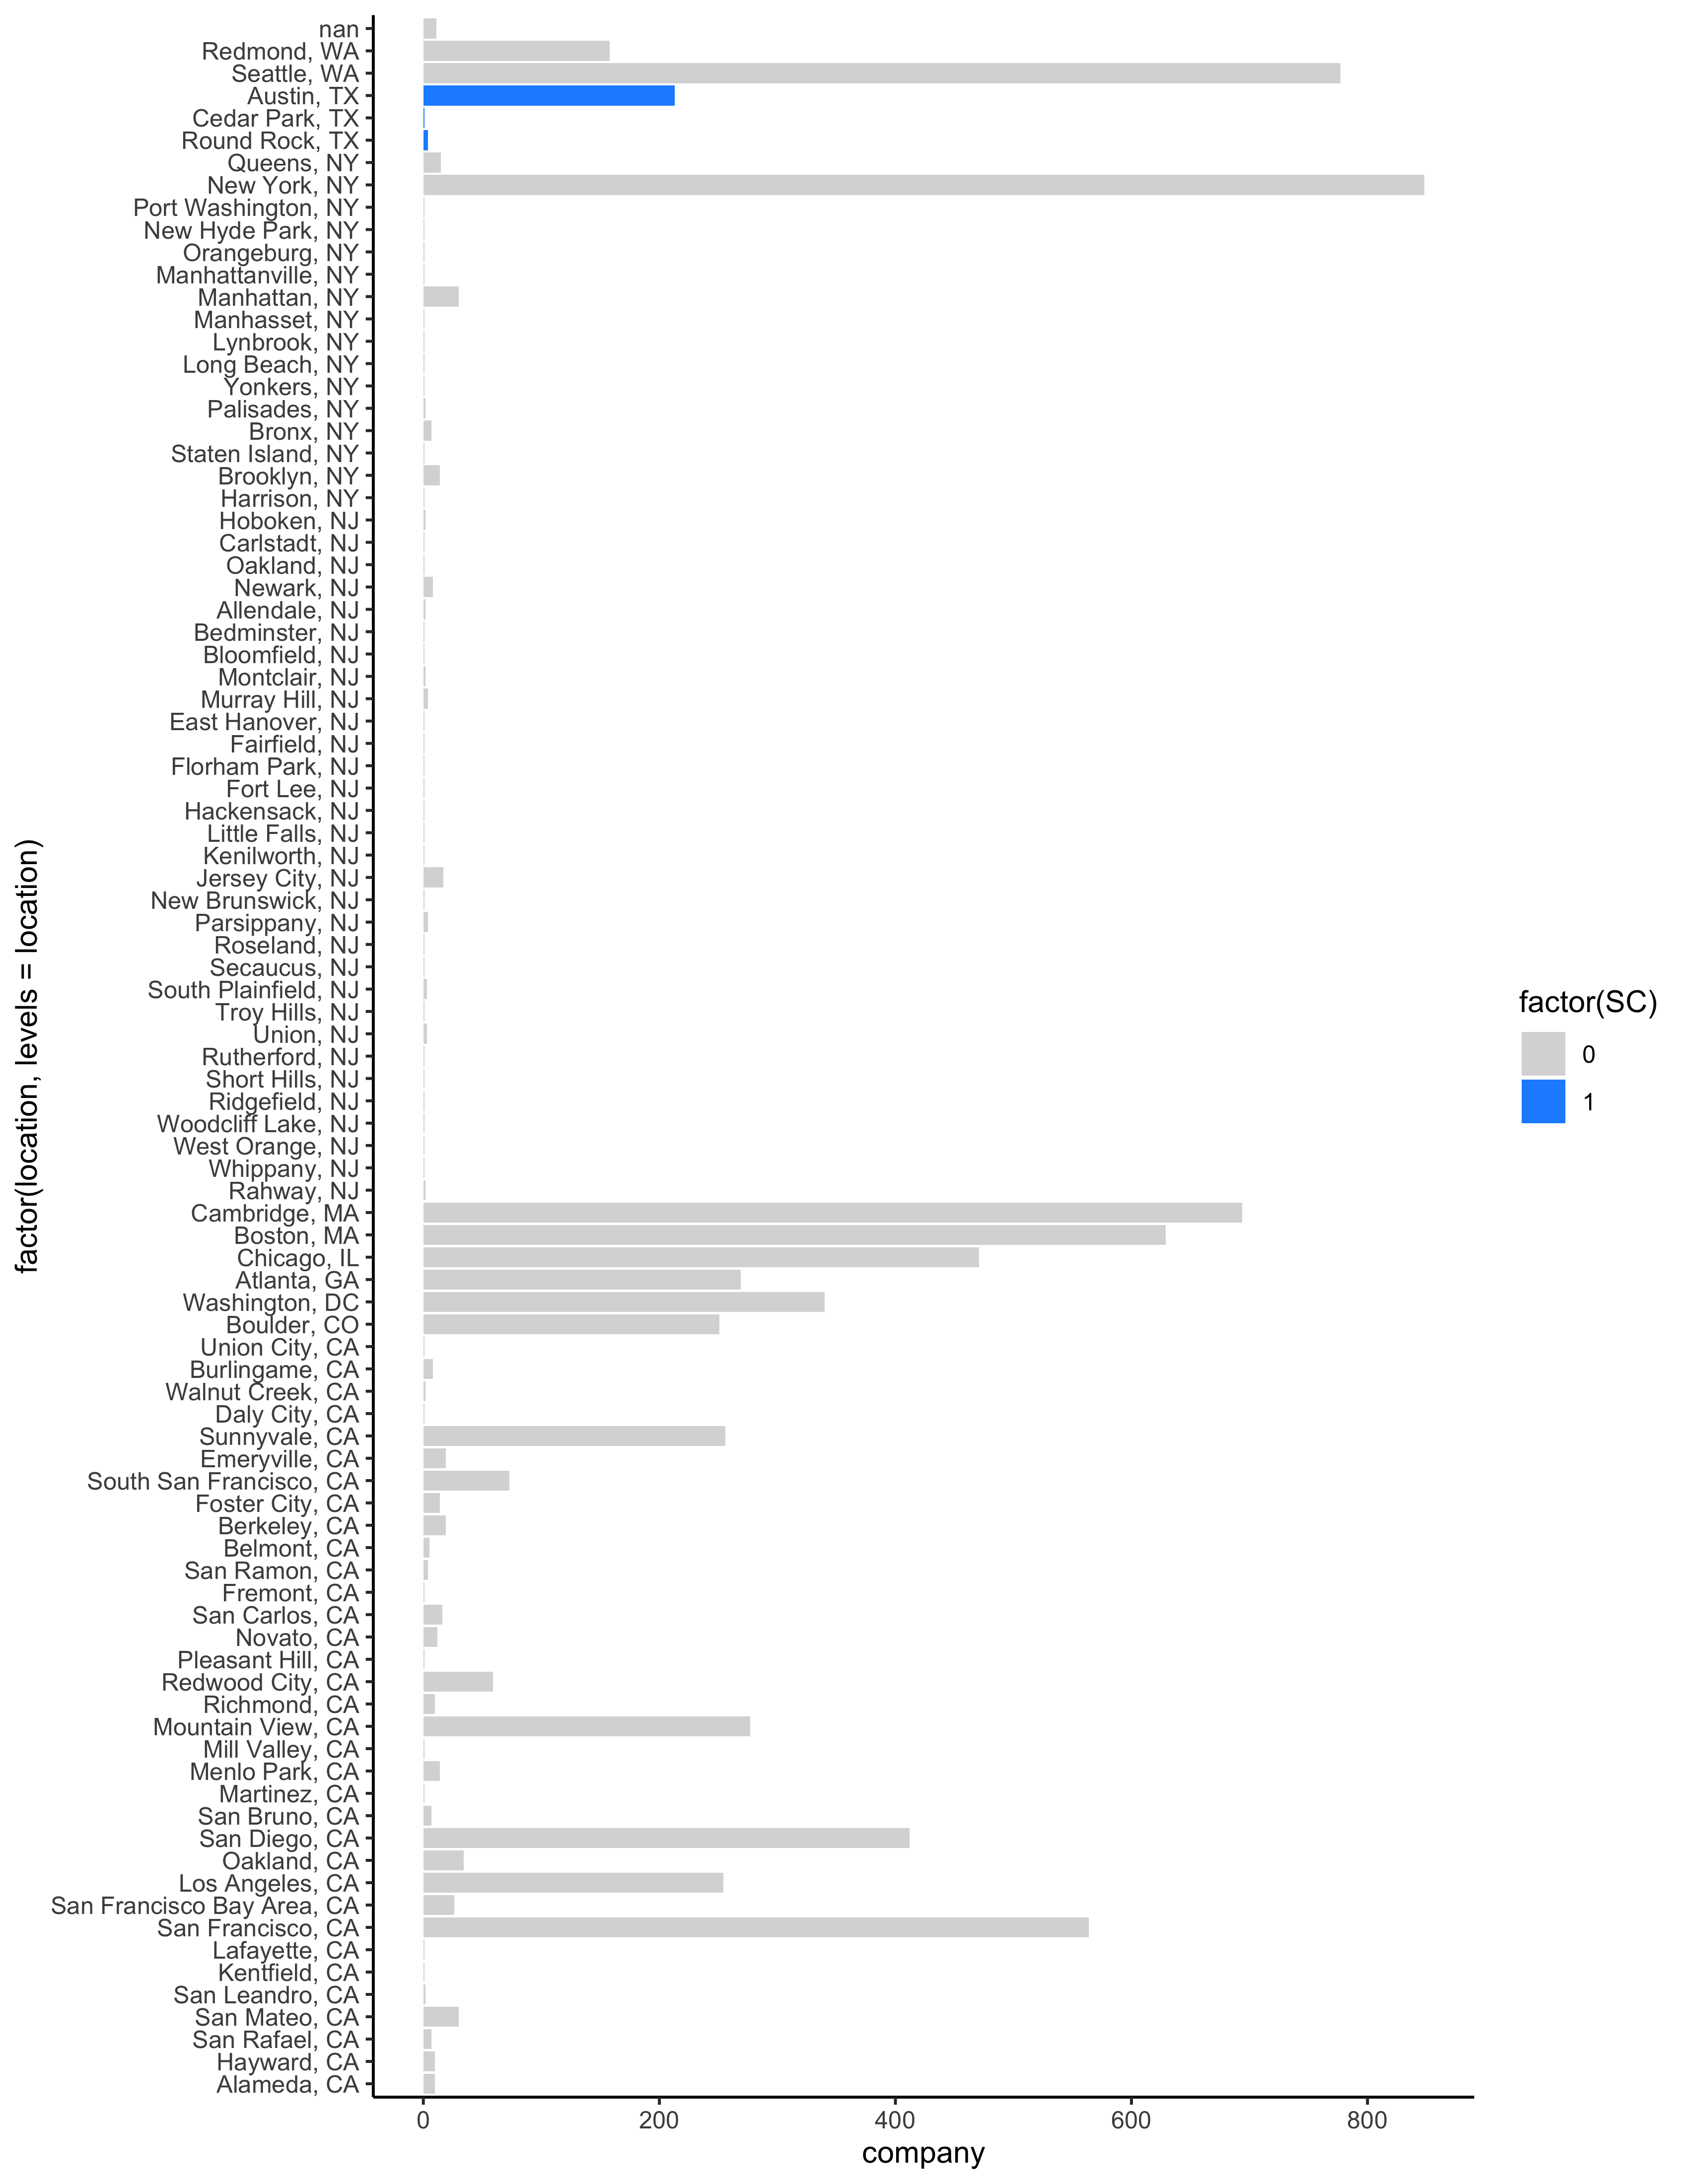

In [18]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(x=factor(location, levels=location), y=company, fill=factor(SC)), data=location_ct) +
scale_fill_manual(values=c('grey85', 'dodgerblue')) +
coord_flip() + theme_bw() + theme_minimal() + theme_classic()

In [92]:
software = pd.read_csv('Data Scientist Job Search Terms - software skills.csv')
general = pd.read_csv('Data Scientist Job Search Terms - general skills.csv')

In [93]:
counter = 0
x = ''
for i in data.description:
    if i.lower().find("doesn't") != -1 or i.lower().find('does not') != -1 or i.lower().find("don't") != -1 or i.lower().find("do not") != -1:
        counter += 1
        x += (i.lower() + '\n\n\n')
f = open('desc.txt', 'w')
f.write(x)

4815888

In [94]:
software = software.Keyword[0:37]
software

0           Python
1                R
2              SQL
3            Spark
4           Hadoop
5             Java
6              SAS
7          Tableau
8             Hive
9            Scala
10             C++
11             AWS
12      TensorFlow
13          Matlab
14               C
15           Excel
16           Linux
17           NoSQL
18           Azure
19    Scikit-learn
20            SPSS
21          Pandas
22           Numpy
23             Pig
24              D3
25           Keras
26      Javascript
27             C# 
28            Perl
29           Hbase
30          Docker
31             Git
32           MySQL
33         MongoDB
34       Cassandra
35         PyTorch
36           Caffe
Name: Keyword, dtype: object

In [95]:
counter

1081

In [96]:
general2 = pd.concat([general.loc[[0,1,2,3,4,5,6,8,10,11,12,13,14,20,25], 'Keyword'], pd.Series(['nlp', 'ai'])], ignore_index=True)
general2

0                machine learning
1                        analysis
2                      statistics
3                computer science
4                   communication
5                     mathematics
6                   visualization
7                   deep learning
8            software development
9                 neural networks
10               data engineering
11             project management
12           software engineering
13        artificial intelligence
14    natural language processing
15                            nlp
16                             ai
dtype: object

In [97]:
general2[16] = ' ai '
general2

0                machine learning
1                        analysis
2                      statistics
3                computer science
4                   communication
5                     mathematics
6                   visualization
7                   deep learning
8            software development
9                 neural networks
10               data engineering
11             project management
12           software engineering
13        artificial intelligence
14    natural language processing
15                            nlp
16                            ai 
dtype: object

In [98]:
punct = '!"$%&\'()*,./:;<=>?@[\\]^_`{|}~'

In [99]:
import string
import re

from collections import Counter, defaultdict
software_count = {}
general_count = {}
for skill in software:
    software_count[skill.lower().strip()] = 0
for skill in general2:
    if skill != ' ai ':
        skill = skill.lower().strip()
    general_count[skill] = 0
    
desc = data.description.dropna()

def words(text):
    regex = re.compile('[' + re.escape(punct) + '\\r\\t\\n]')
    nopunct = regex.sub(" ", text)  # delete stuff but leave at least a space to avoid clumping together
    words = nopunct.split(" ")
    words = [w.lower() for w in words]
    return words

#Update software_count dict
for i in desc:
    set_of_words = set(words(i))
    for word in set_of_words:
        if word.strip() in software_count:
            software_count[word.strip()] += 1

for j in desc:
    normalized_desc = ' '.join(words(j))
    nlp_abbr_i = -1
    nlp_n_abbr_i = -1
    ai_abbr_i = -1
    ai_n_abbr_i = -1
    for i in general_count:
        indx = normalized_desc.lower().find(i)
        if i == 'nlp':
            nlp_abbr_i = indx
        elif i == 'natural language processing':
            nlp_n_abbr_i = indx
        elif i == 'ai':
            ai_abbr_i = indx
        elif i == 'artificial intelligence':
            ai_n_abbr_i = indx
        
        if indx != -1:
            general_count[i] += 1
            
    #Used to make sure not to double count 'natural language processing' and 'nlp'. Similar for 'ai'
    if nlp_abbr_i != -1 and nlp_n_abbr_i != -1:
        general_count['natural language processing'] -= 1
    if ai_abbr_i != -1 and ai_n_abbr_i != -1:
        general_count['artificial intelligence'] -= 1

In [100]:
software_count

{'python': 2821,
 'r': 2188,
 'sql': 1670,
 'spark': 957,
 'hadoop': 914,
 'java': 1234,
 'sas': 652,
 'tableau': 488,
 'hive': 485,
 'scala': 501,
 'c++': 956,
 'aws': 642,
 'tensorflow': 402,
 'matlab': 558,
 'c': 672,
 'excel': 986,
 'linux': 527,
 'nosql': 330,
 'azure': 241,
 'scikit-learn': 191,
 'spss': 209,
 'pandas': 183,
 'numpy': 147,
 'pig': 172,
 'd3': 136,
 'keras': 124,
 'javascript': 353,
 'c#': 241,
 'perl': 320,
 'hbase': 112,
 'docker': 159,
 'git': 214,
 'mysql': 169,
 'mongodb': 115,
 'cassandra': 114,
 'pytorch': 126,
 'caffe': 124}

In [101]:
general_count

{'machine learning': 2452,
 'analysis': 3958,
 'statistics': 2110,
 'computer science': 2403,
 'communication': 4100,
 'mathematics': 1184,
 'visualization': 1016,
 'deep learning': 592,
 'software development': 808,
 'neural networks': 291,
 'data engineering': 265,
 'project management': 627,
 'software engineering': 464,
 'artificial intelligence': 485,
 'natural language processing': 299,
 'nlp': 329,
 ' ai ': 605}

In [102]:
general_count[' ai '] += general_count['artificial intelligence']
general_count['nlp'] += general_count['natural language processing']
del general_count['artificial intelligence']
del general_count['natural language processing']
general_count

{'machine learning': 2452,
 'analysis': 3958,
 'statistics': 2110,
 'computer science': 2403,
 'communication': 4100,
 'mathematics': 1184,
 'visualization': 1016,
 'deep learning': 592,
 'software development': 808,
 'neural networks': 291,
 'data engineering': 265,
 'project management': 627,
 'software engineering': 464,
 'nlp': 628,
 ' ai ': 1090}

In [103]:
software = pd.DataFrame.from_dict(software_count, orient='index').reset_index()
general = pd.DataFrame.from_dict(general_count, orient='index').reset_index()
software.columns = ['skill', 'ct']
general.columns = ['skill', 'ct']
software.sort_values('ct', inplace=True)
general.sort_values('ct', inplace=True)
software.skill = pd.Categorical(software.skill, categories=software.skill, ordered=True)
general.skill = pd.Categorical(general.skill, categories=general.skill, ordered=True)

In [111]:
mean_ct = software.ct.mean()
software['diff'] = software.ct - mean_ct
software['mean_ct'] = mean_ct
software['flag'] = software.ct > mean_ct

In [112]:
%R -i software
%R -i general
%R -i mean_ct

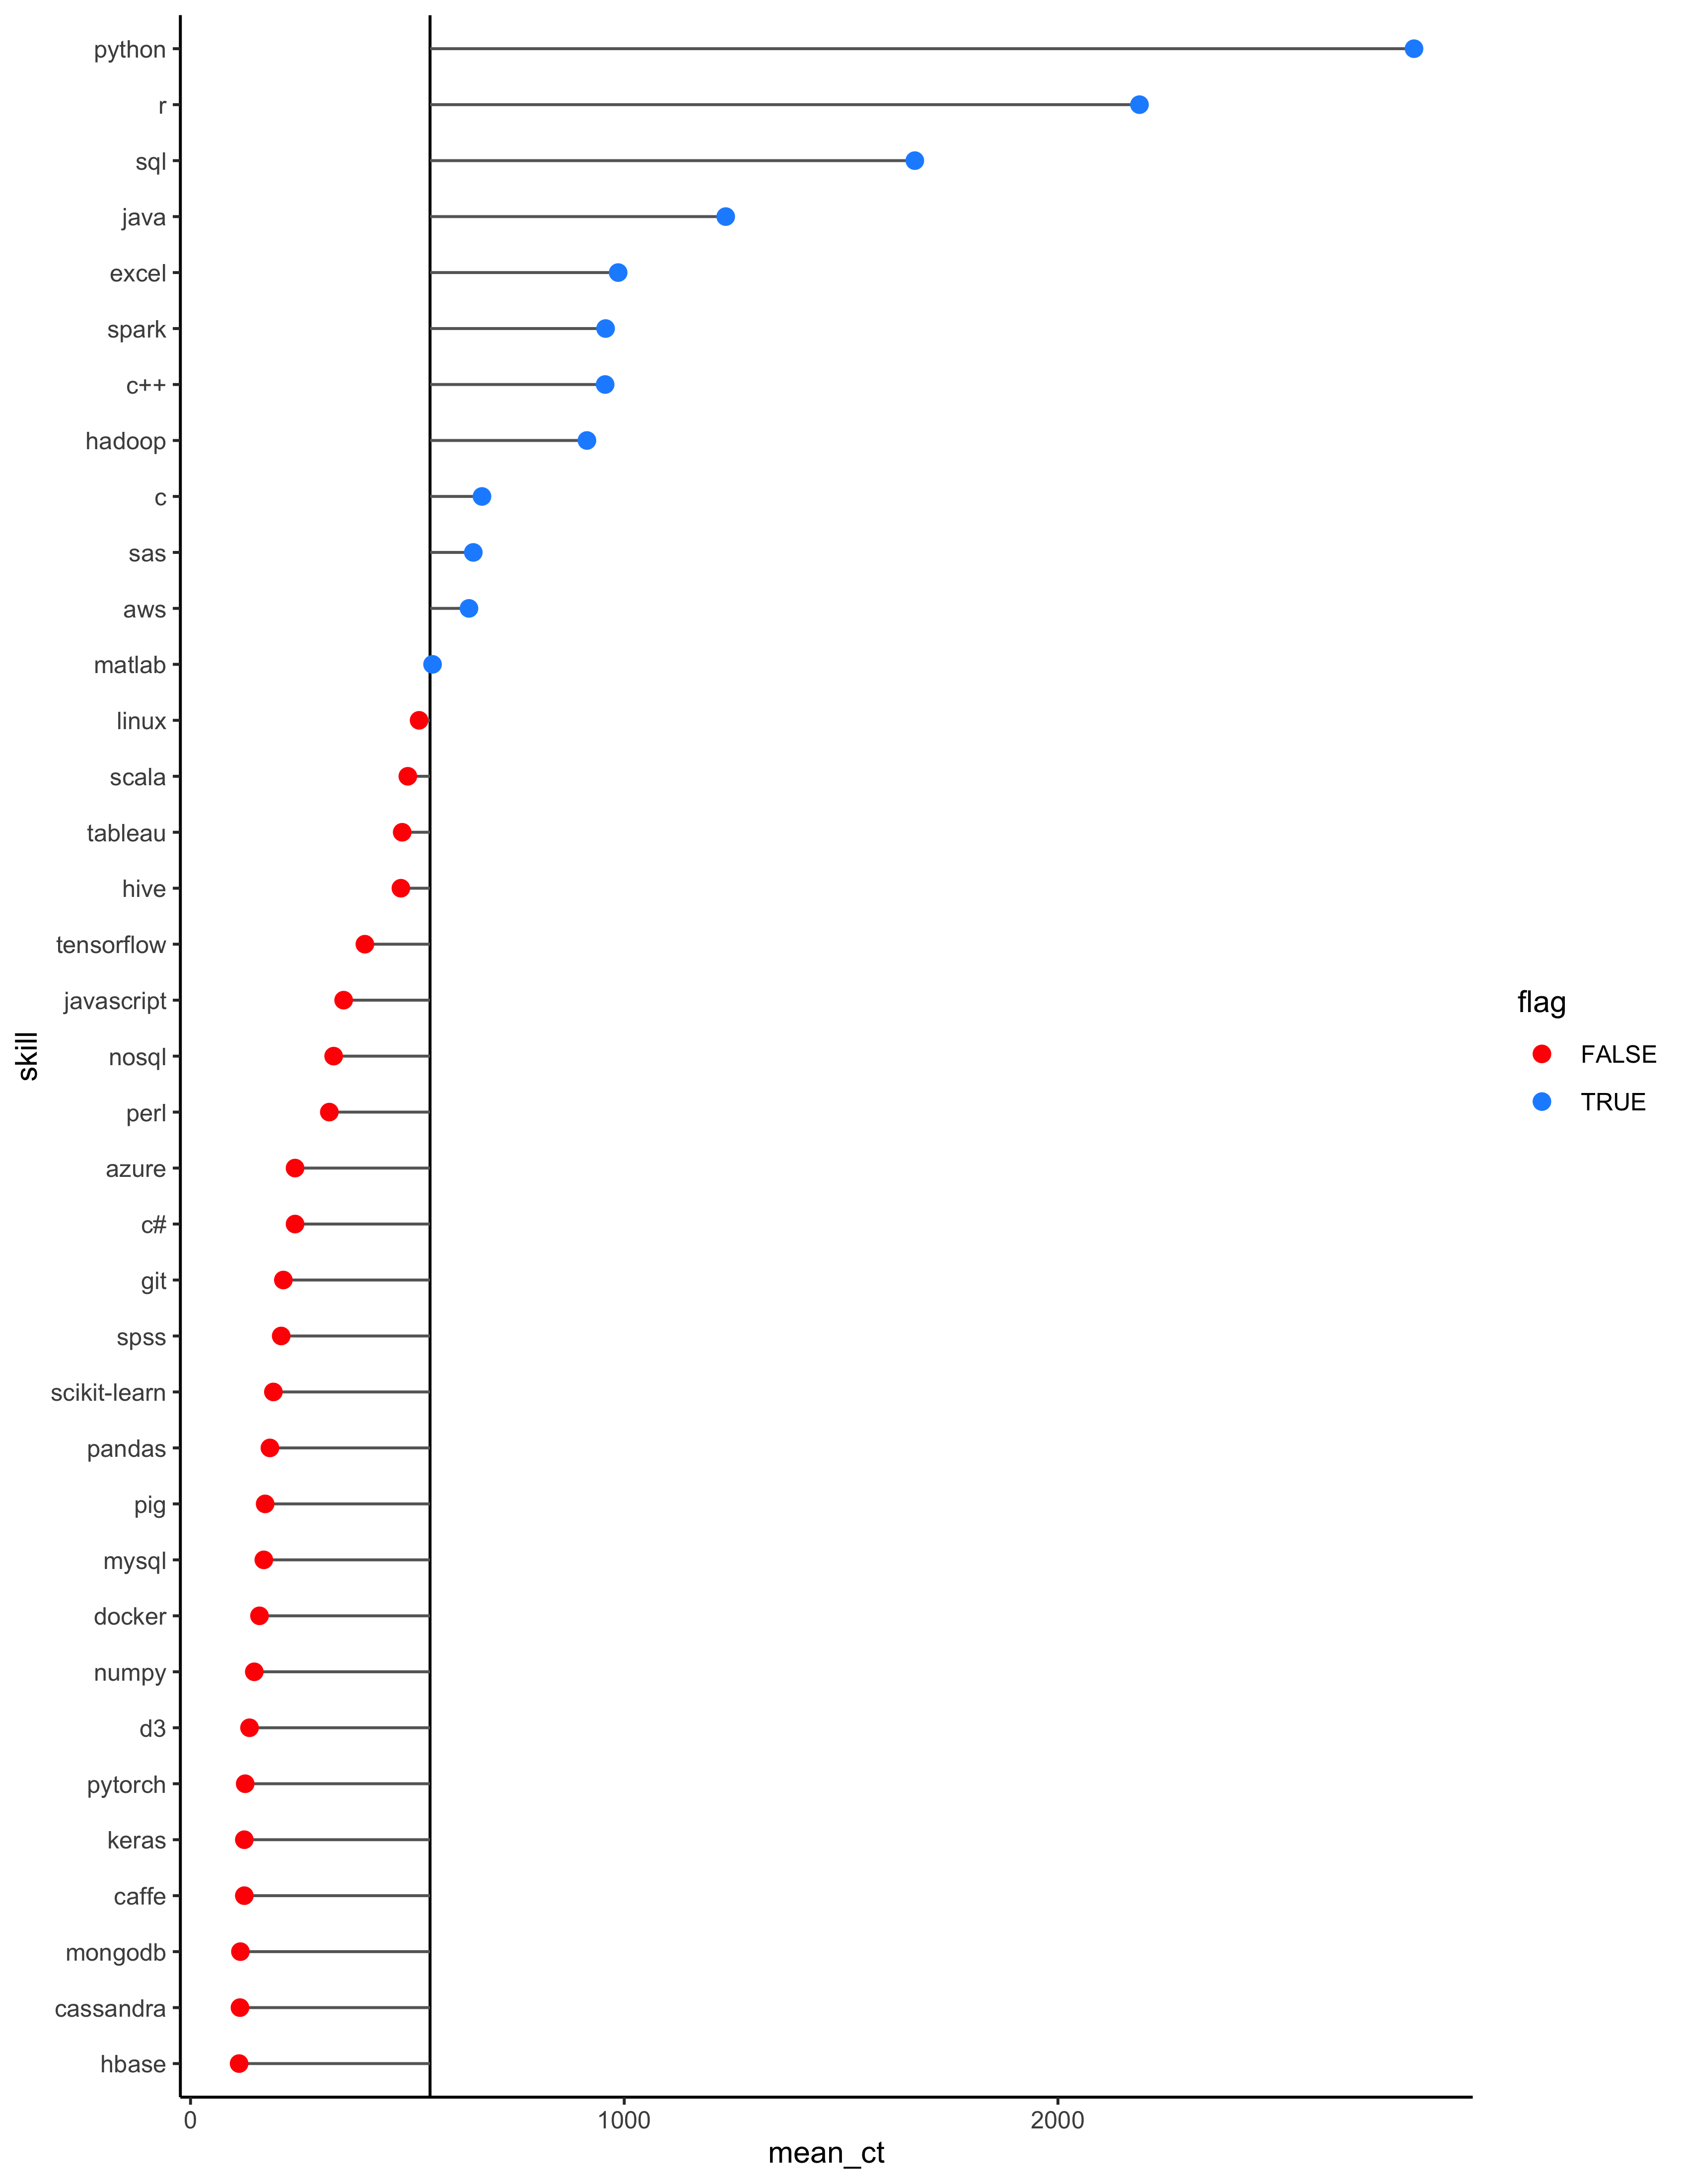

In [118]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_hline(yintercept = mean_ct) +
geom_segment(aes(y=mean_ct, x=skill, xend=skill, yend=ct), data=software, color='grey40') +
geom_point(aes(x=skill, y=ct, color=flag), data=software, size=2.5) + 
scale_color_manual(values=c('red', 'dodgerblue')) +
theme_bw() + theme_minimal() + theme_classic() + coord_flip()

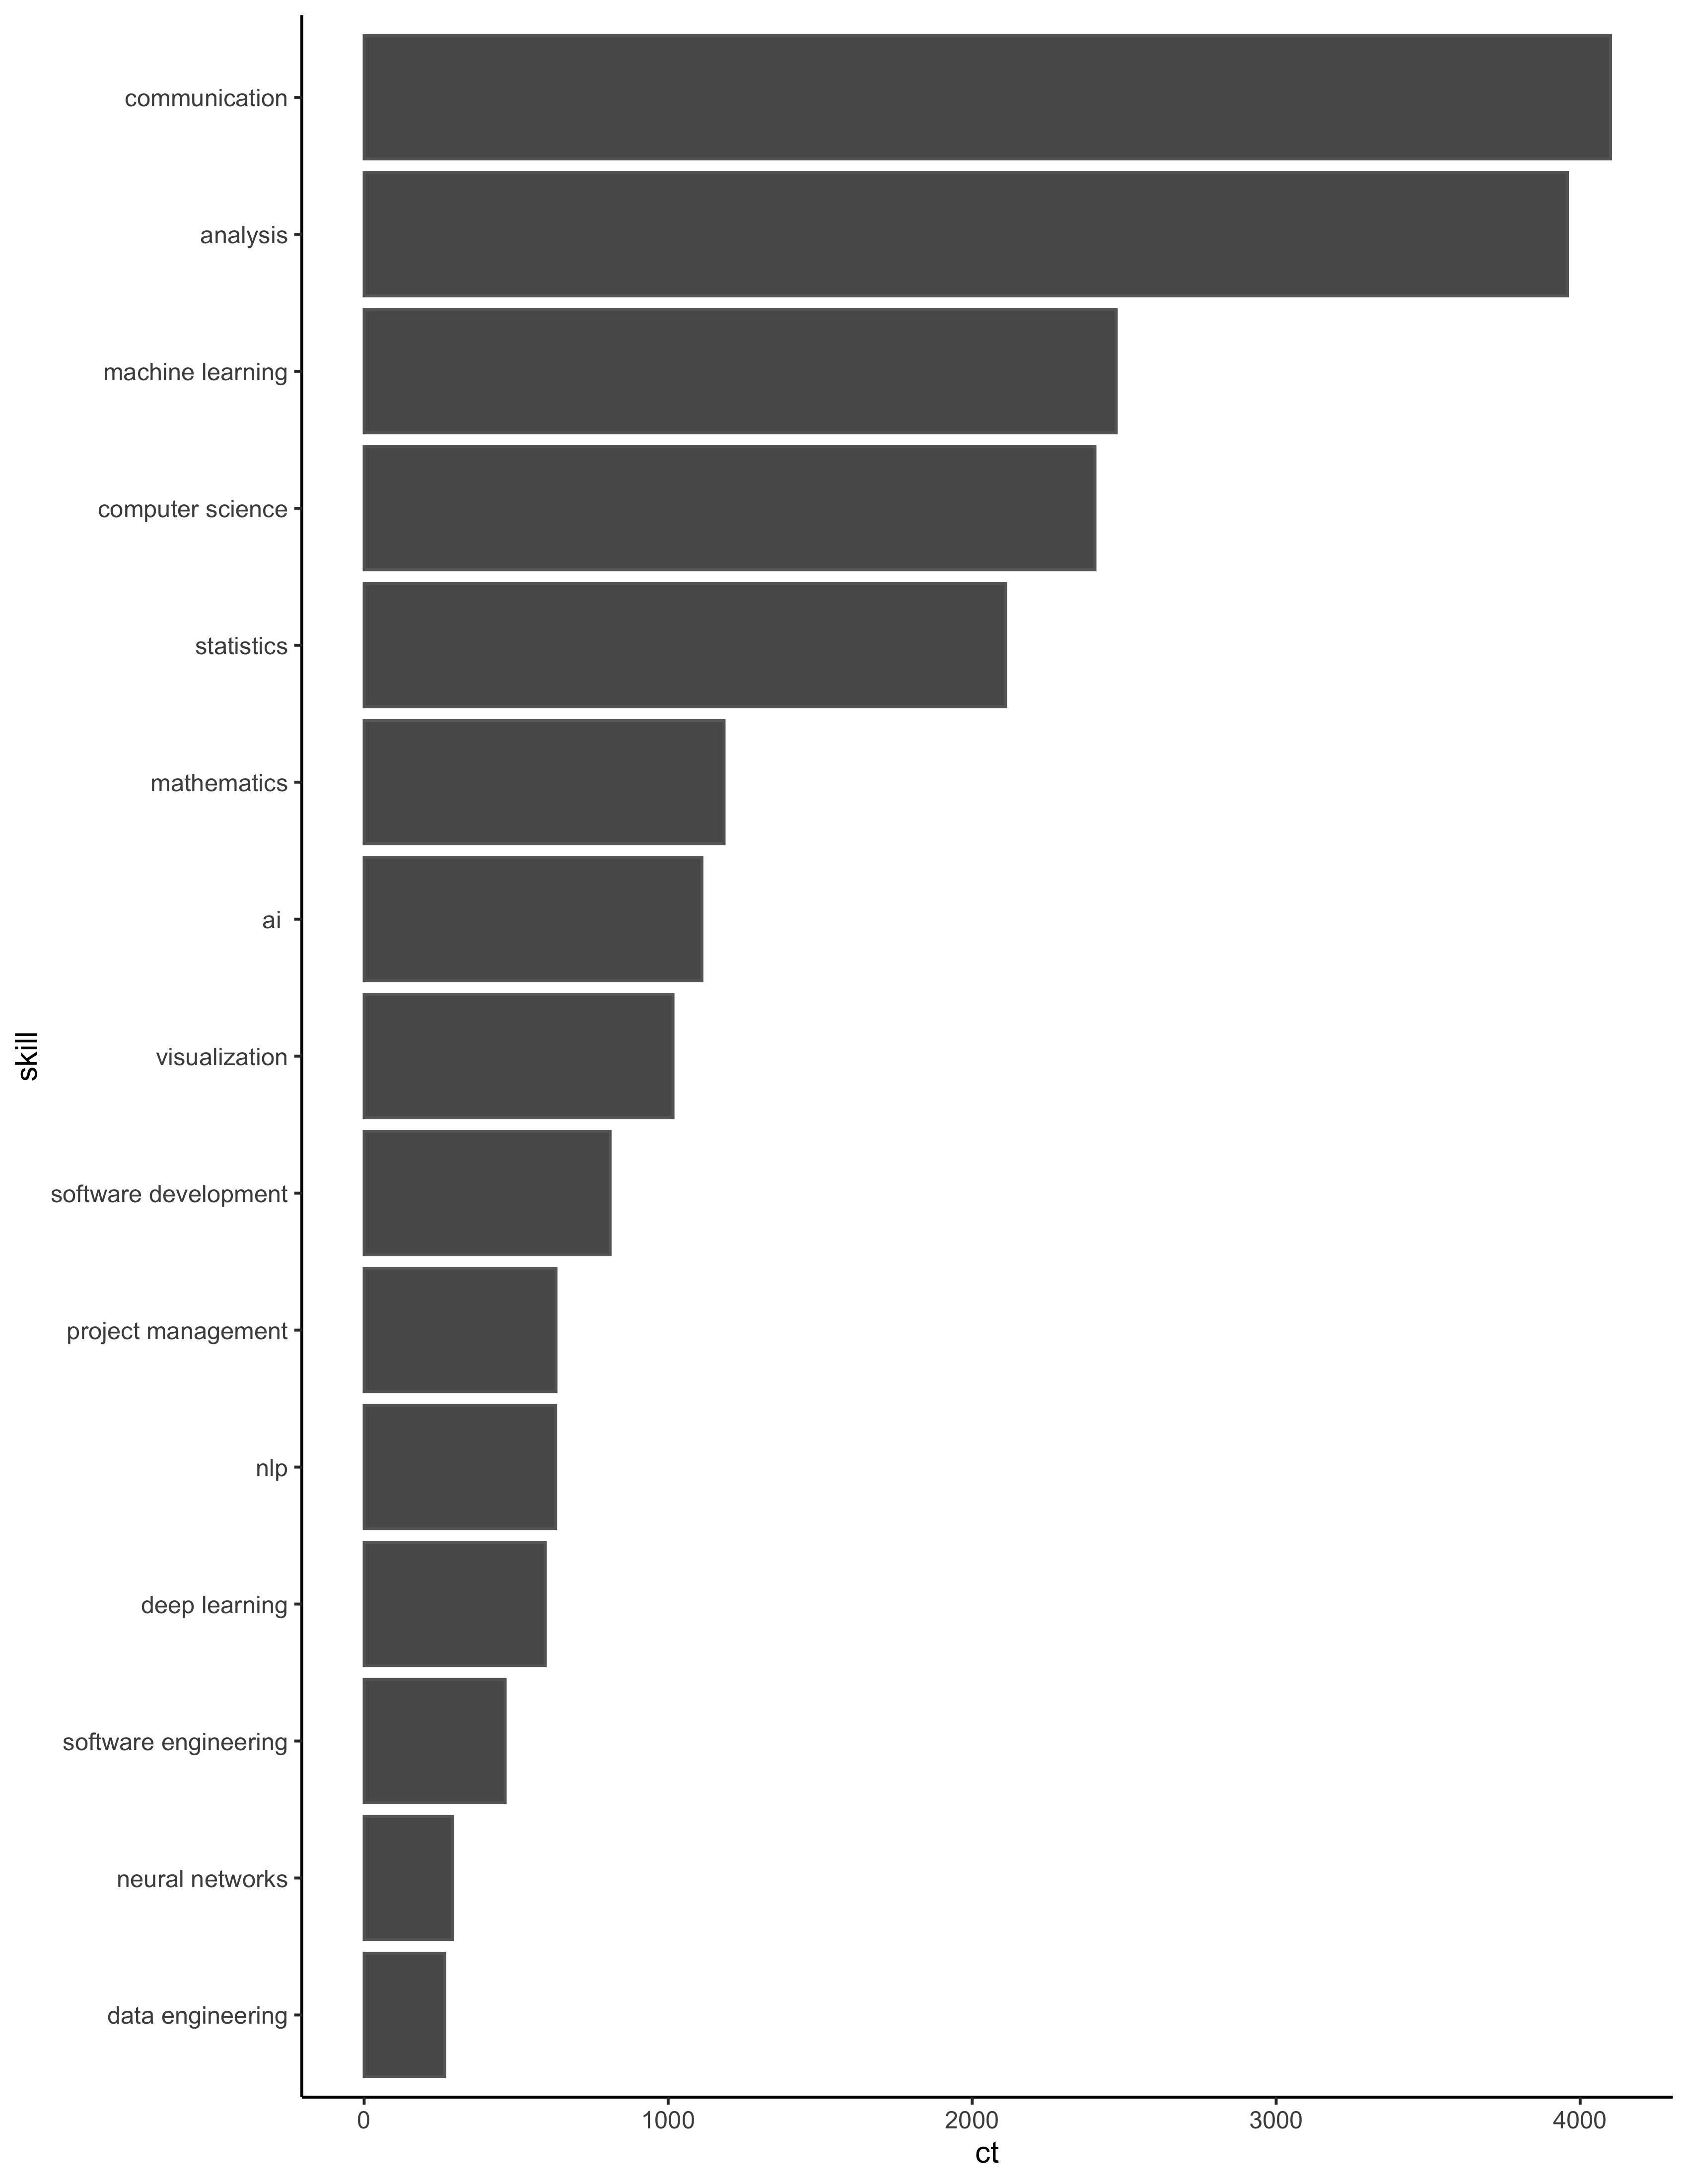

In [70]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_col(aes(y=ct, x=skill), data=general, color='grey40') +
theme_bw() + theme_minimal() + theme_classic() + coord_flip()

In [81]:
from collections import Counter
positions = data.position.dropna().map(str.lower)
positions = Counter(positions)
positions = pd.DataFrame.from_dict(positions, orient='index').reset_index()
positions.columns = ['position', 'ct']
positions = positions.sort_values('ct').reset_index(drop=True)
positions.loc[0:4, 'flag'] = 1
positions.flag.fillna(0, inplace=True)
positions = positions.sort_values('ct', ascending=False)
%R -i positions

In [ ]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() + 
geom_col(aes(x=position, y=ct), data=positions) + 
theme_bw() + theme_minimal() + theme_classic() + coord_flip()

In [82]:
positions

position   ct  flag
5215                                     data scientist  355   0.0
5214                              senior data scientist   98   0.0
5213                                   research analyst   66   0.0
5212                                      data engineer   63   0.0
5211                          machine learning engineer   56   0.0
5210                                 research scientist   32   0.0
5209                                lead data scientist   31   0.0
5208                                 sr. data scientist   30   0.0
5207                           principal data scientist   24   0.0
5206                                  software engineer   23   0.0
5205                                       data analyst   23   0.0
5204                               quantitative analyst   21   0.0
5203                                          scientist   17   0.0
5202                                    product manager   17   0.0
5200                           bioinformatics scientist   16   0.0
5201                           senior software engineer   16   0.0
5199                            market research analyst   15   0.0
5198                software engineer, machine learning   13   0.0
5197                         machine learning scientist   13   0.0
5196                                   senior scientist   12   0.0
5195                               senior data engineer   12   0.0
5194                            senior research analyst   12   0.0
5193                               staff data scientist   11   0.0
5192                                associate scientist   11   0.0
5191                      software development engineer   11   0.0
5190                     student research collaboration    9   0.0
5189                                 lead data engineer    9   0.0
5188                                 research associate    9   0.0
5185                                  sr. data engineer    8   0.0
5184                                 clinical scientist    8   0.0
...                                                 ...  ...   ...
1721                           front-end engineer-yahoo    1   0.0
1731              senior product manager - ad targeting    1   0.0
1720                senior pharmacovigilance specialist    1   0.0
1719  platform software engineer - fixed networks ga...    1   0.0
1718  strategic technology partner manager, machine ...    1   0.0
1717                  it r&d business system analyst ii    1   0.0
1716  senior data scientist, algorithms and machine ...    1   0.0
1715  sales strategy and operations manager, custome...    1   0.0
1714                             clinical trial manager    1   0.0
1730  senior system specialist, lte - digital automa...    1   0.0
1732                    staff site reliability engineer    1   0.0
1750                            (senior) data scientist    1   0.0
1742                senior full stack software engineer    1   0.0
1749  quantitative researcher: precision crop fertility    1   0.0
1748              scientist i/ii, translational biology    1   0.0
1747                director of analytics / data mining    1   0.0
1746                   front end developer - yahoo news    1   0.0
1745  associate scientist, htp molecular biology & e...    1   0.0
1744          staff software engineer, cloud enablement    1   0.0
1743     senior dsp engineer - fixed networks gainspeed    1   0.0
1741     sr. software engineer, cloud enablement sherpa    1   0.0
1733                    sr product development engineer    1   0.0
1740                                   sr. ui developer    1   0.0
1739              senior software engineer - full stack    1   0.0
1738                    sr networking software engineer    1   0.0
1737                sr. core java developer - gainspeed    1   0.0
1736  senior full stack engineer - advertising techn...    1   0.0
1735  staff software engineer, customer engineering ...    1   0.0
1734                       